In [1]:
import sys
from pathlib import Path

script_path = Path.cwd().parent / 'gpr'
sys.path.append(str(script_path))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sb
import corner
import cmcrameri as cmc

import anal_helpers as anal
import prepare_ceft as pc

import post_anal as pa

from constants import get_phi

from aquarel import load_theme

theme_dark = (
        load_theme("gruvbox_dark")
        .set_font("serif")
        .set_grid(True, width=0.2)
        )

theme = (
        load_theme("scientific")
        .set_font("serif")
        .set_grid(True, width=0.2)
        .set_lines(width=2)
        .set_axes(top=True, right=True)
        .set_ticks(width_major=1.2, width_minor=0.9, size_major=10, size_minor=4, direction='in')
        .set_tick_labels(right=True, top=True)
        .set_overrides({
            "ytick.right": "true",
            "xtick.top": "true",
        })
        .set_title(pad=15)
        #.set_axis_labels(weight='bold')
        )

theme_cont = (
        load_theme("scientific")
        .set_font("serif")
        .set_grid(True, width=0.2)
        .set_lines(width=2)
        .set_axes(top=True, right=True)
        .set_ticks(width_major=1.2, width_minor=0.9, size_major=10, size_minor=4, direction='in')
        #.set_tick_labels(right=True, top=True)
        .set_overrides({
            "ytick.right": "true",
            "xtick.top": "true",
        })
        .set_title(pad=15)
        #.set_axis_labels(weight='bold')
        )

theme_cont.apply()


n_ceft, cs2_ceft, cs2_l, cs2_u = anal.get_ceft_cs2()
n = anal.get_n_test(10, 200)

In [2]:
injection_param = {'mass_1': 1.4013655921528583, 'mass_2': 1.251350789219395, 'EOS': 15326, 'luminosity_distance': 186.1146, 'ra': 1.520635390191212, 'dec': 0.45030007475911127, 'theta_jn': 0.19155501532759683, 'psi': 1.8532224222721934, 'phase': 3.869180533501537, 'geocent_time': 1807820461.0, 'a_1': 0.02579833610105956, 'a_2': 0.01157992076217064, 'tilt_1': 1.7821450323807169, 'tilt_2': 1.0741761809182178, 'phi_12': 4.624654103350016, 'phi_jl': 1.2271620128137724, 'chirp_mass': 1.1524448440960904, 'total_mass': 2.652716381372253, 'symmetric_mass_ratio': 0.24920048502652759, 'mass_ratio': 0.8929509873986544, 'redshift': 0.04074999863382214, 'mass_1_source': (1.34649589), 'mass_2_source': (1.20235483), 'TOV_mass': 1.9963680478289905, 'TOV_radius': 10.412495133463992, 'lambda_1': 433.4925391647716, 'lambda_2': 823.1592336148897, 'radius_1': 11.869081447022314, 'radius_2': 11.842364381411363, 'R_14': 11.876464566522206, 'R_16': 11.889110278491556}
injection_param["lambda_tilde"] = pa.lambda_tilde(injection_param["mass_1_source"], injection_param["mass_2_source"], injection_param["lambda_1"], injection_param["lambda_2"])


df_se = pa.load_inj_results(kernel_name = 'SE', set = 1)
df_se2 = pa.load_inj_results(kernel_name = 'SE', set = 2)
df_se3 = pa.load_inj_results(kernel_name = 'SE', set = 3)
df_ge = pa.load_inj_results(kernel_name = 'GE', set = 1)
df_m32 = pa.load_inj_results(kernel_name = 'M32', set = 1)
df_m52 = pa.load_inj_results(kernel_name = 'M52', set = 1)
df_se4 = pa.load_inj_results(kernel_name = 'SE', set = 4)
df_rq = pa.load_inj_results(kernel_name = 'RQ', set = 1)

# Different kernels in $\phi$

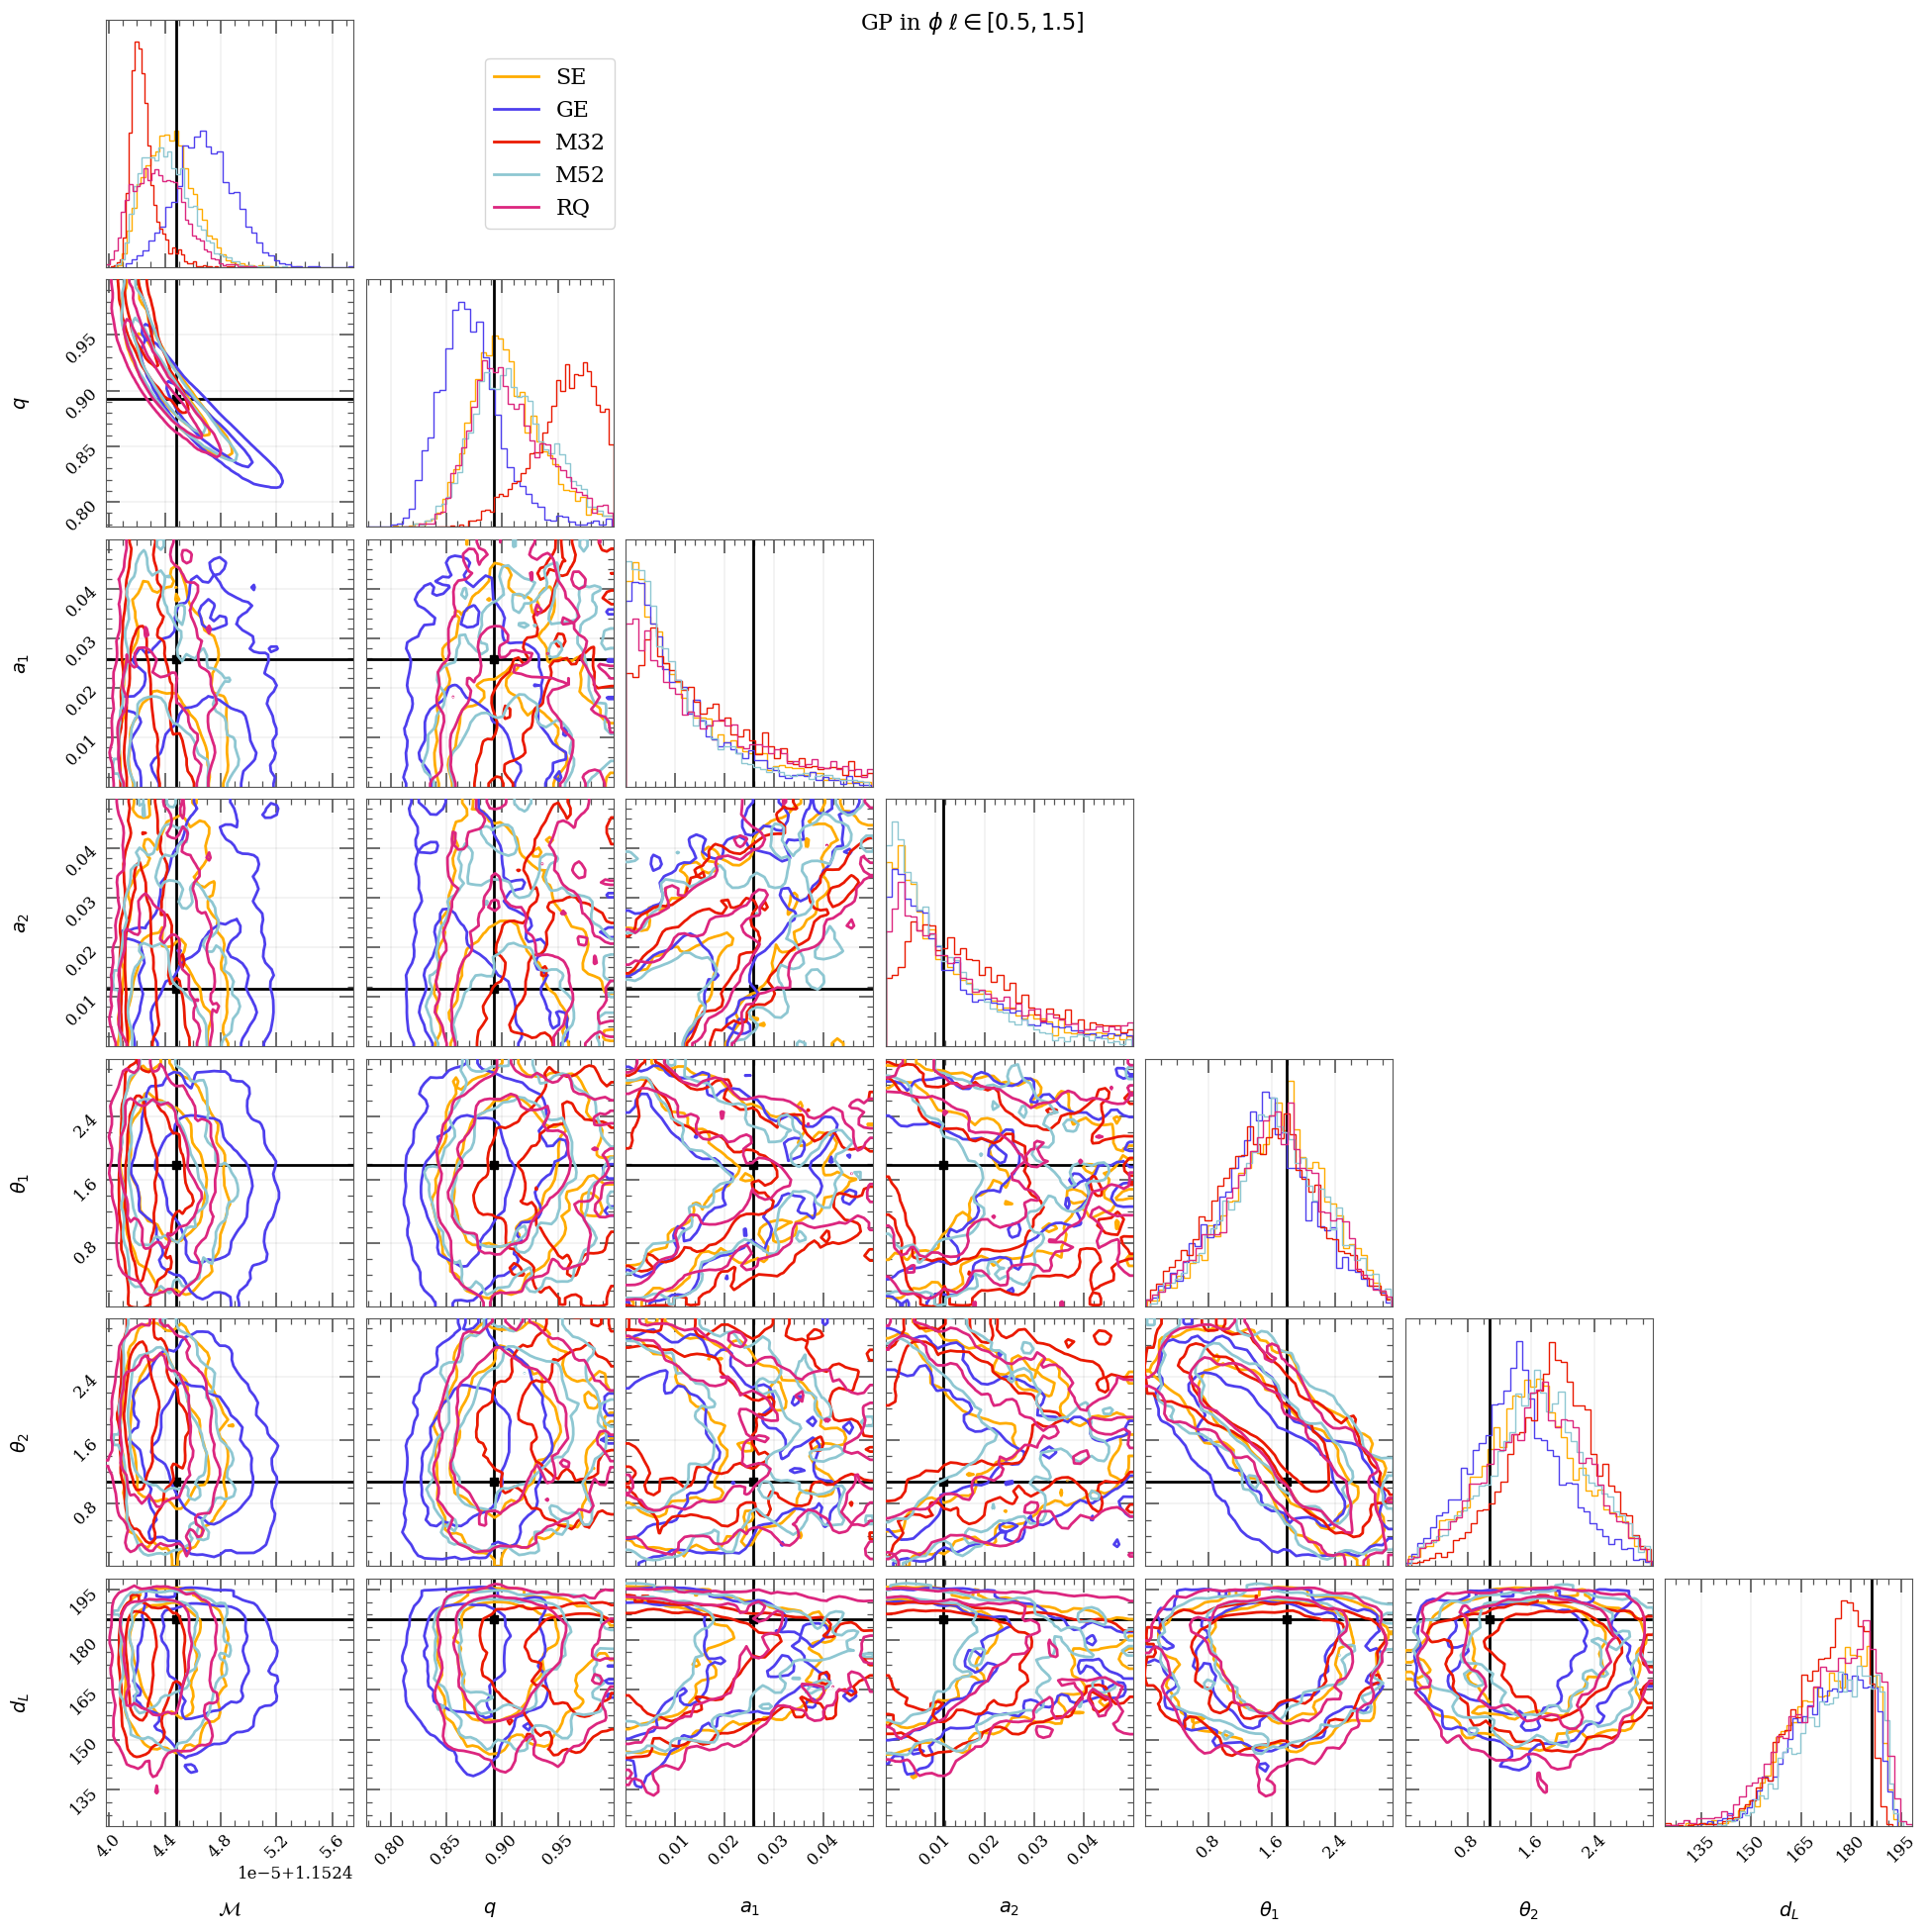

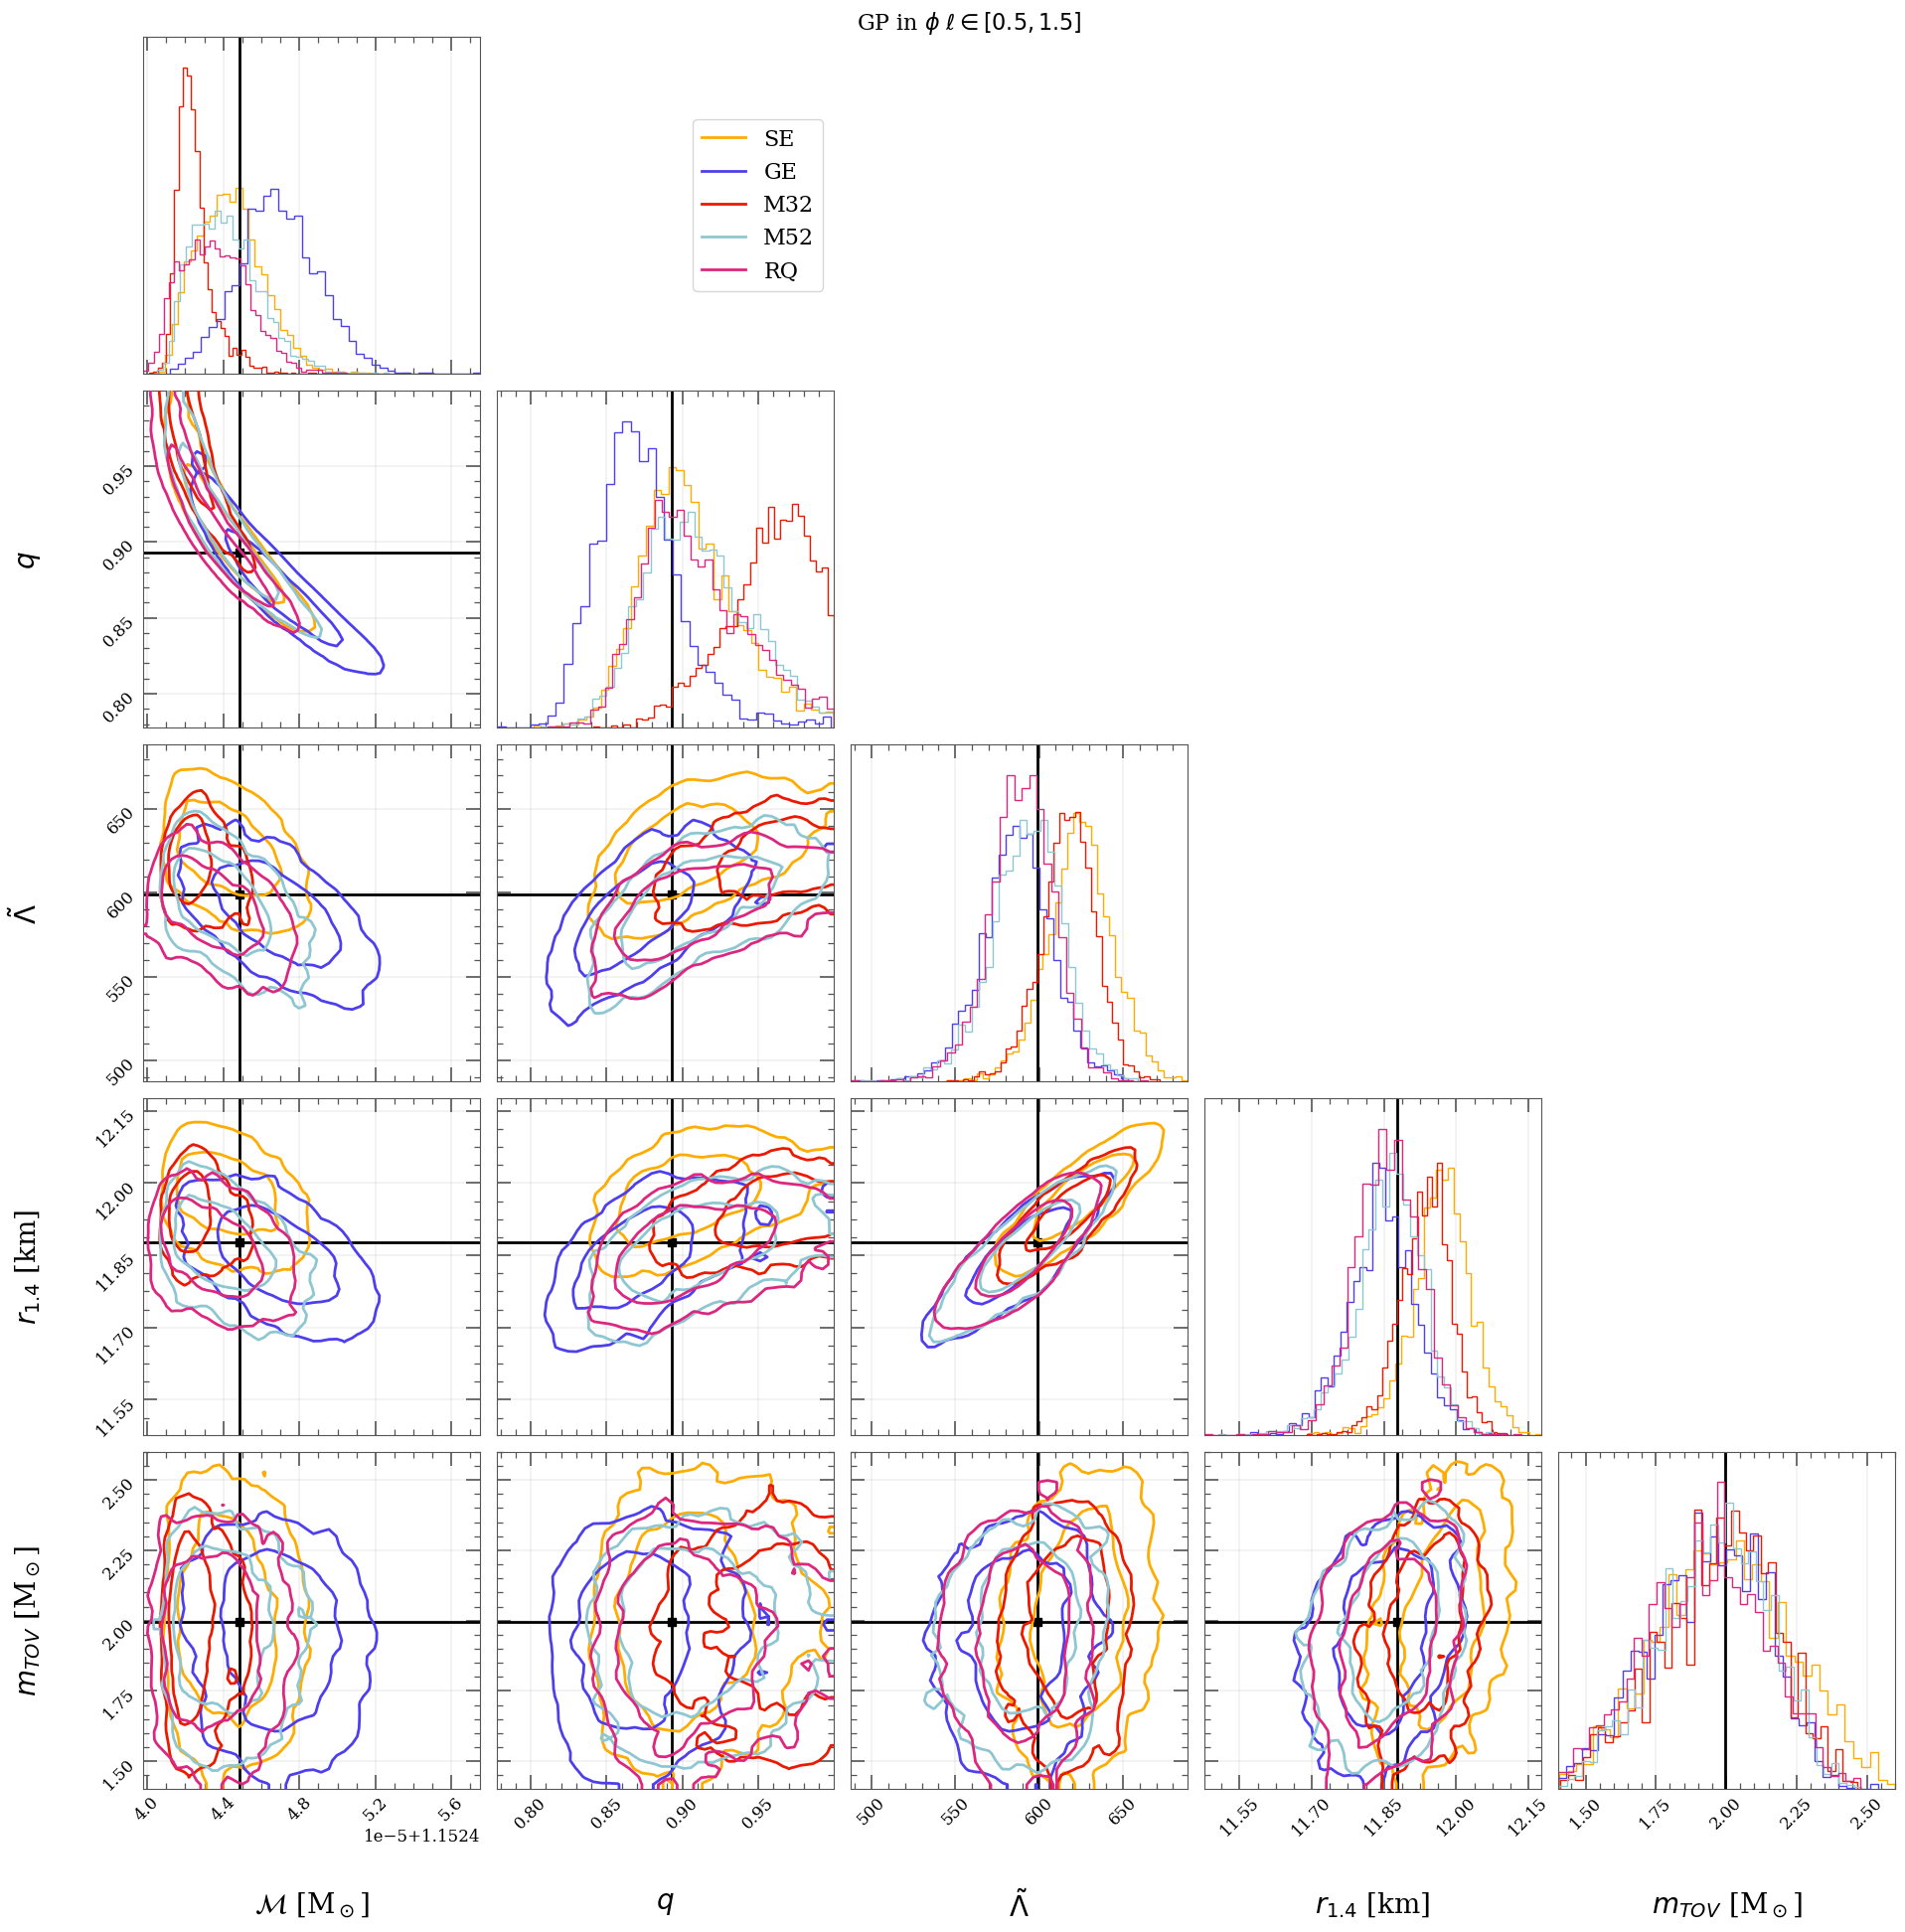

In [3]:
pa.plot_parameters([df_se,df_ge, df_m32, df_m52, df_rq], 
                   injected_params=[injection_param], 
                   title=r"GP in $\phi$ $\ell\in[0.5,1.5]$", 
                   labels=["SE", "GE", "M32", "M52", "RQ"],
                   colours = ['#ffac00', '#4e3fee', '#ea1900', '#8EC7D2', '#DC267F'],
                   truth_colour = "black",
                   contour_fill = False,
                   )

# Different $\ell$ range for SE

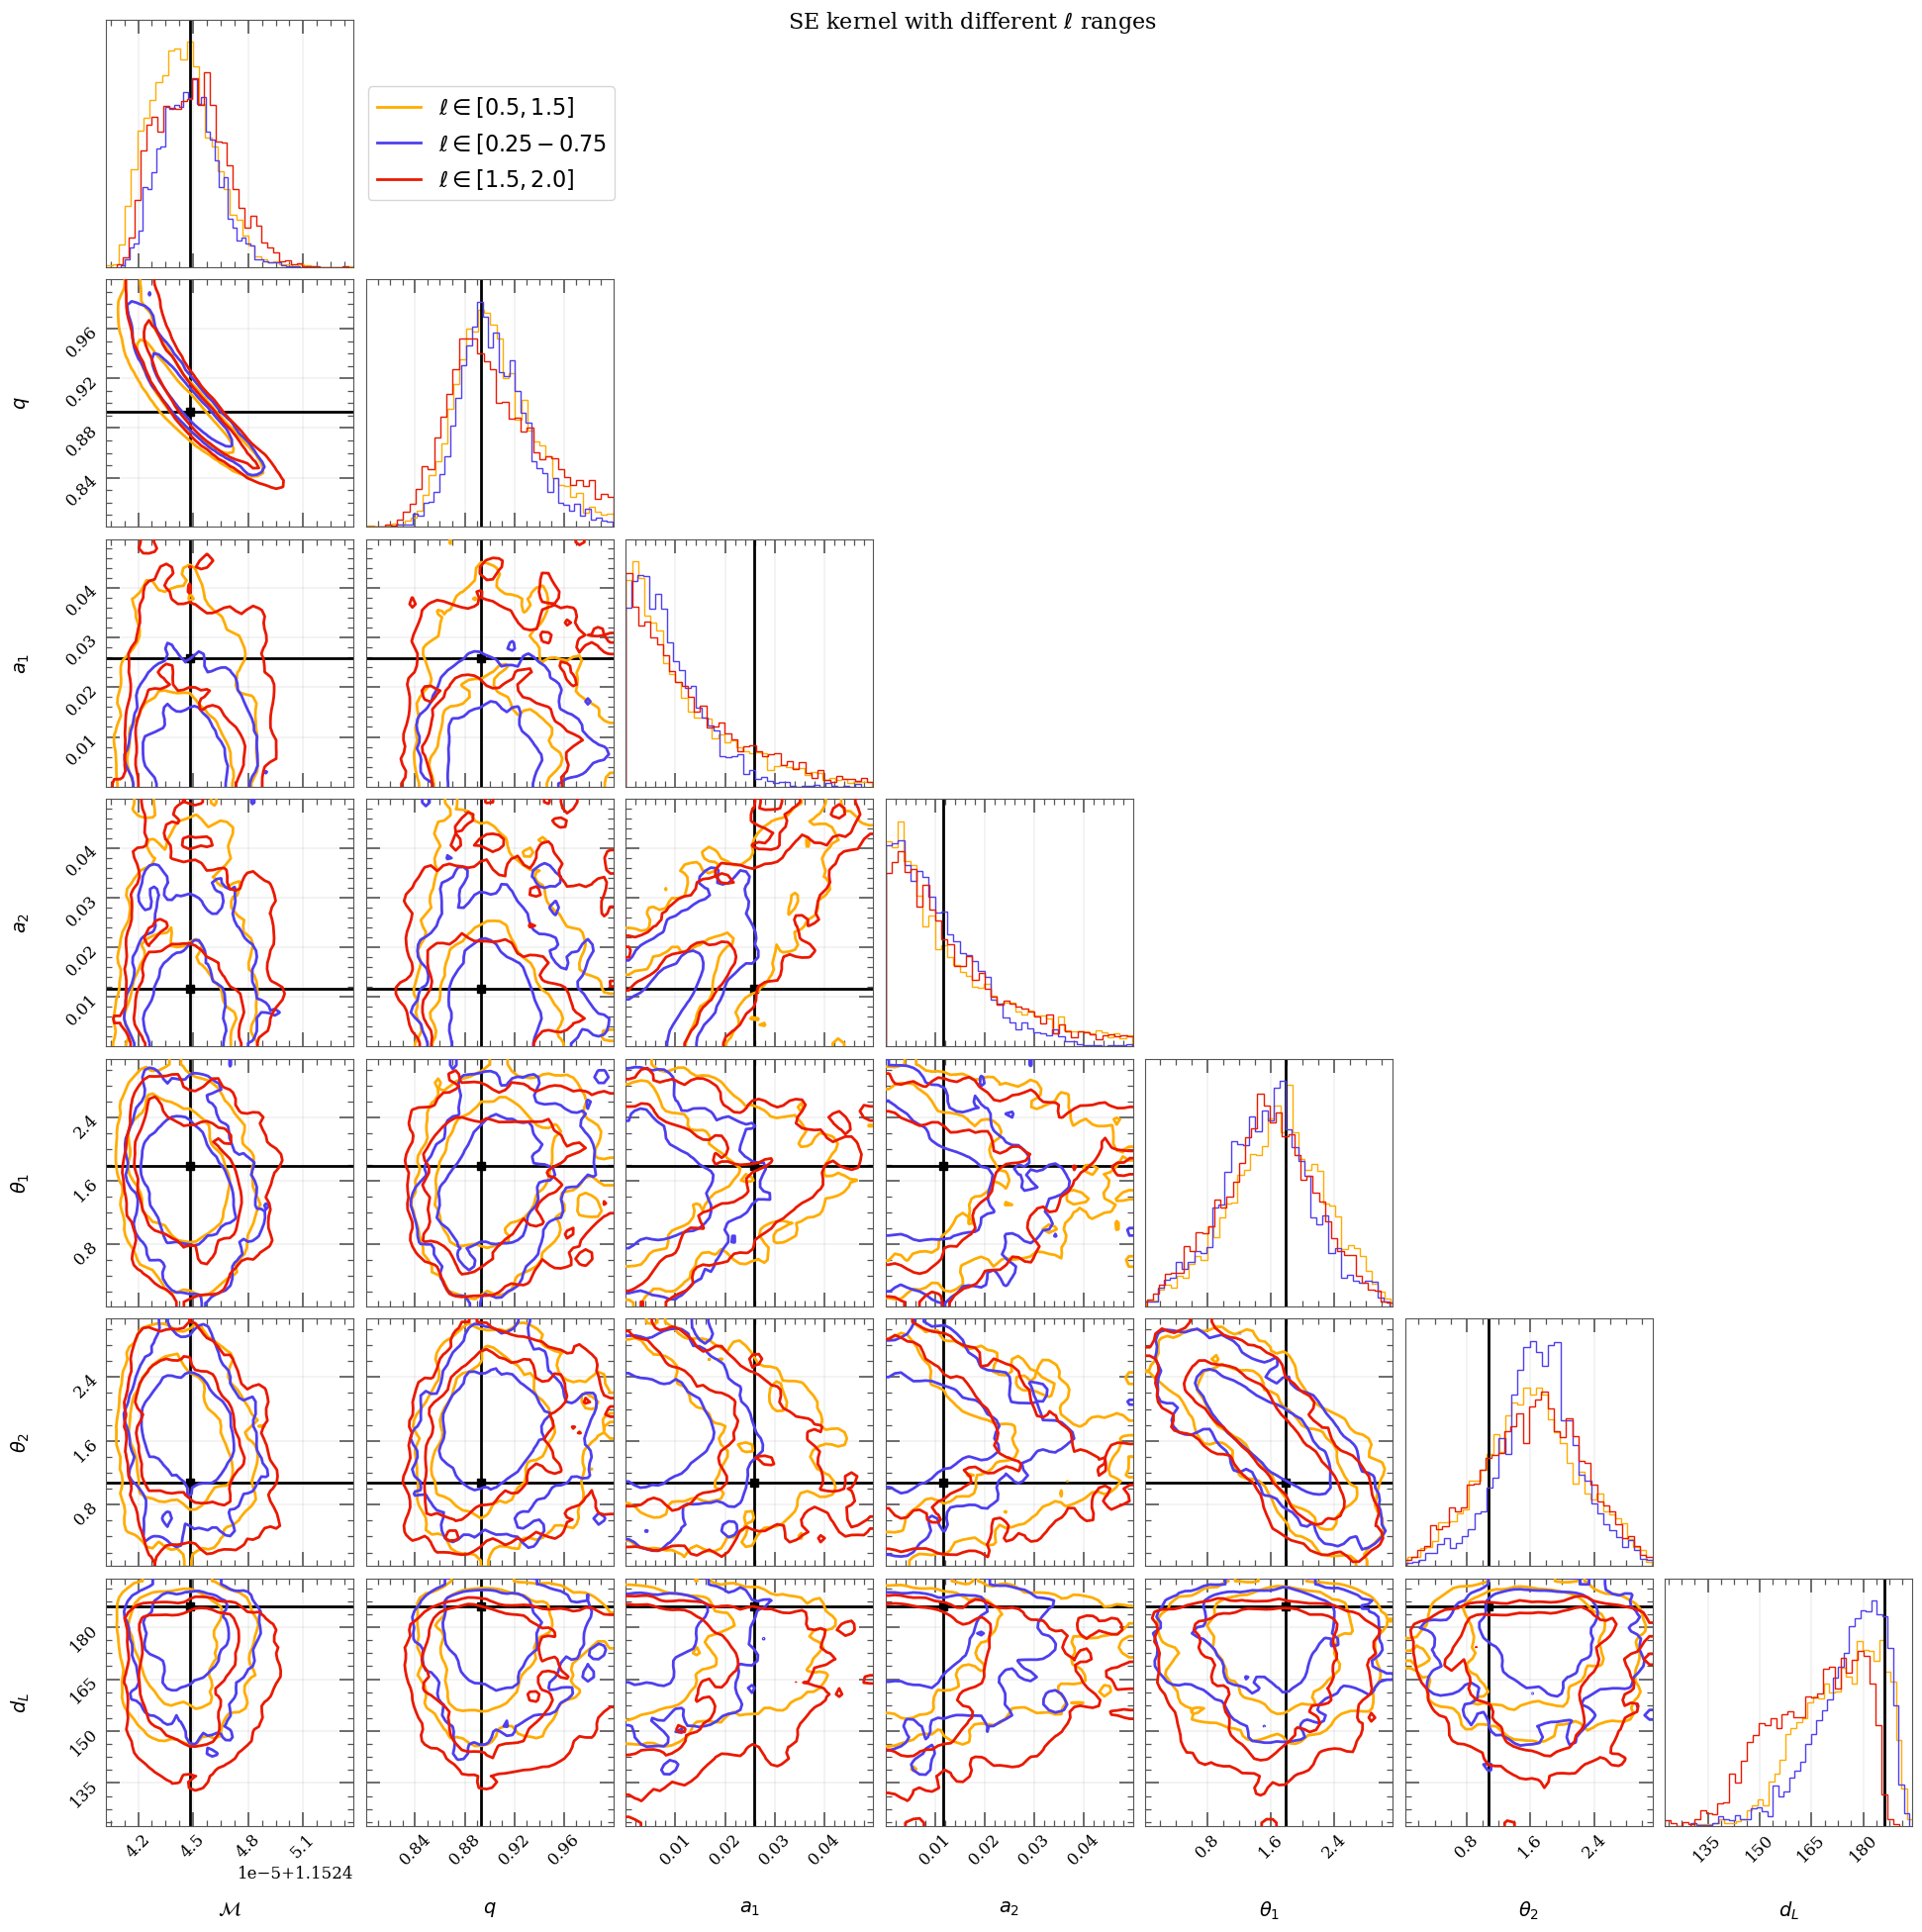

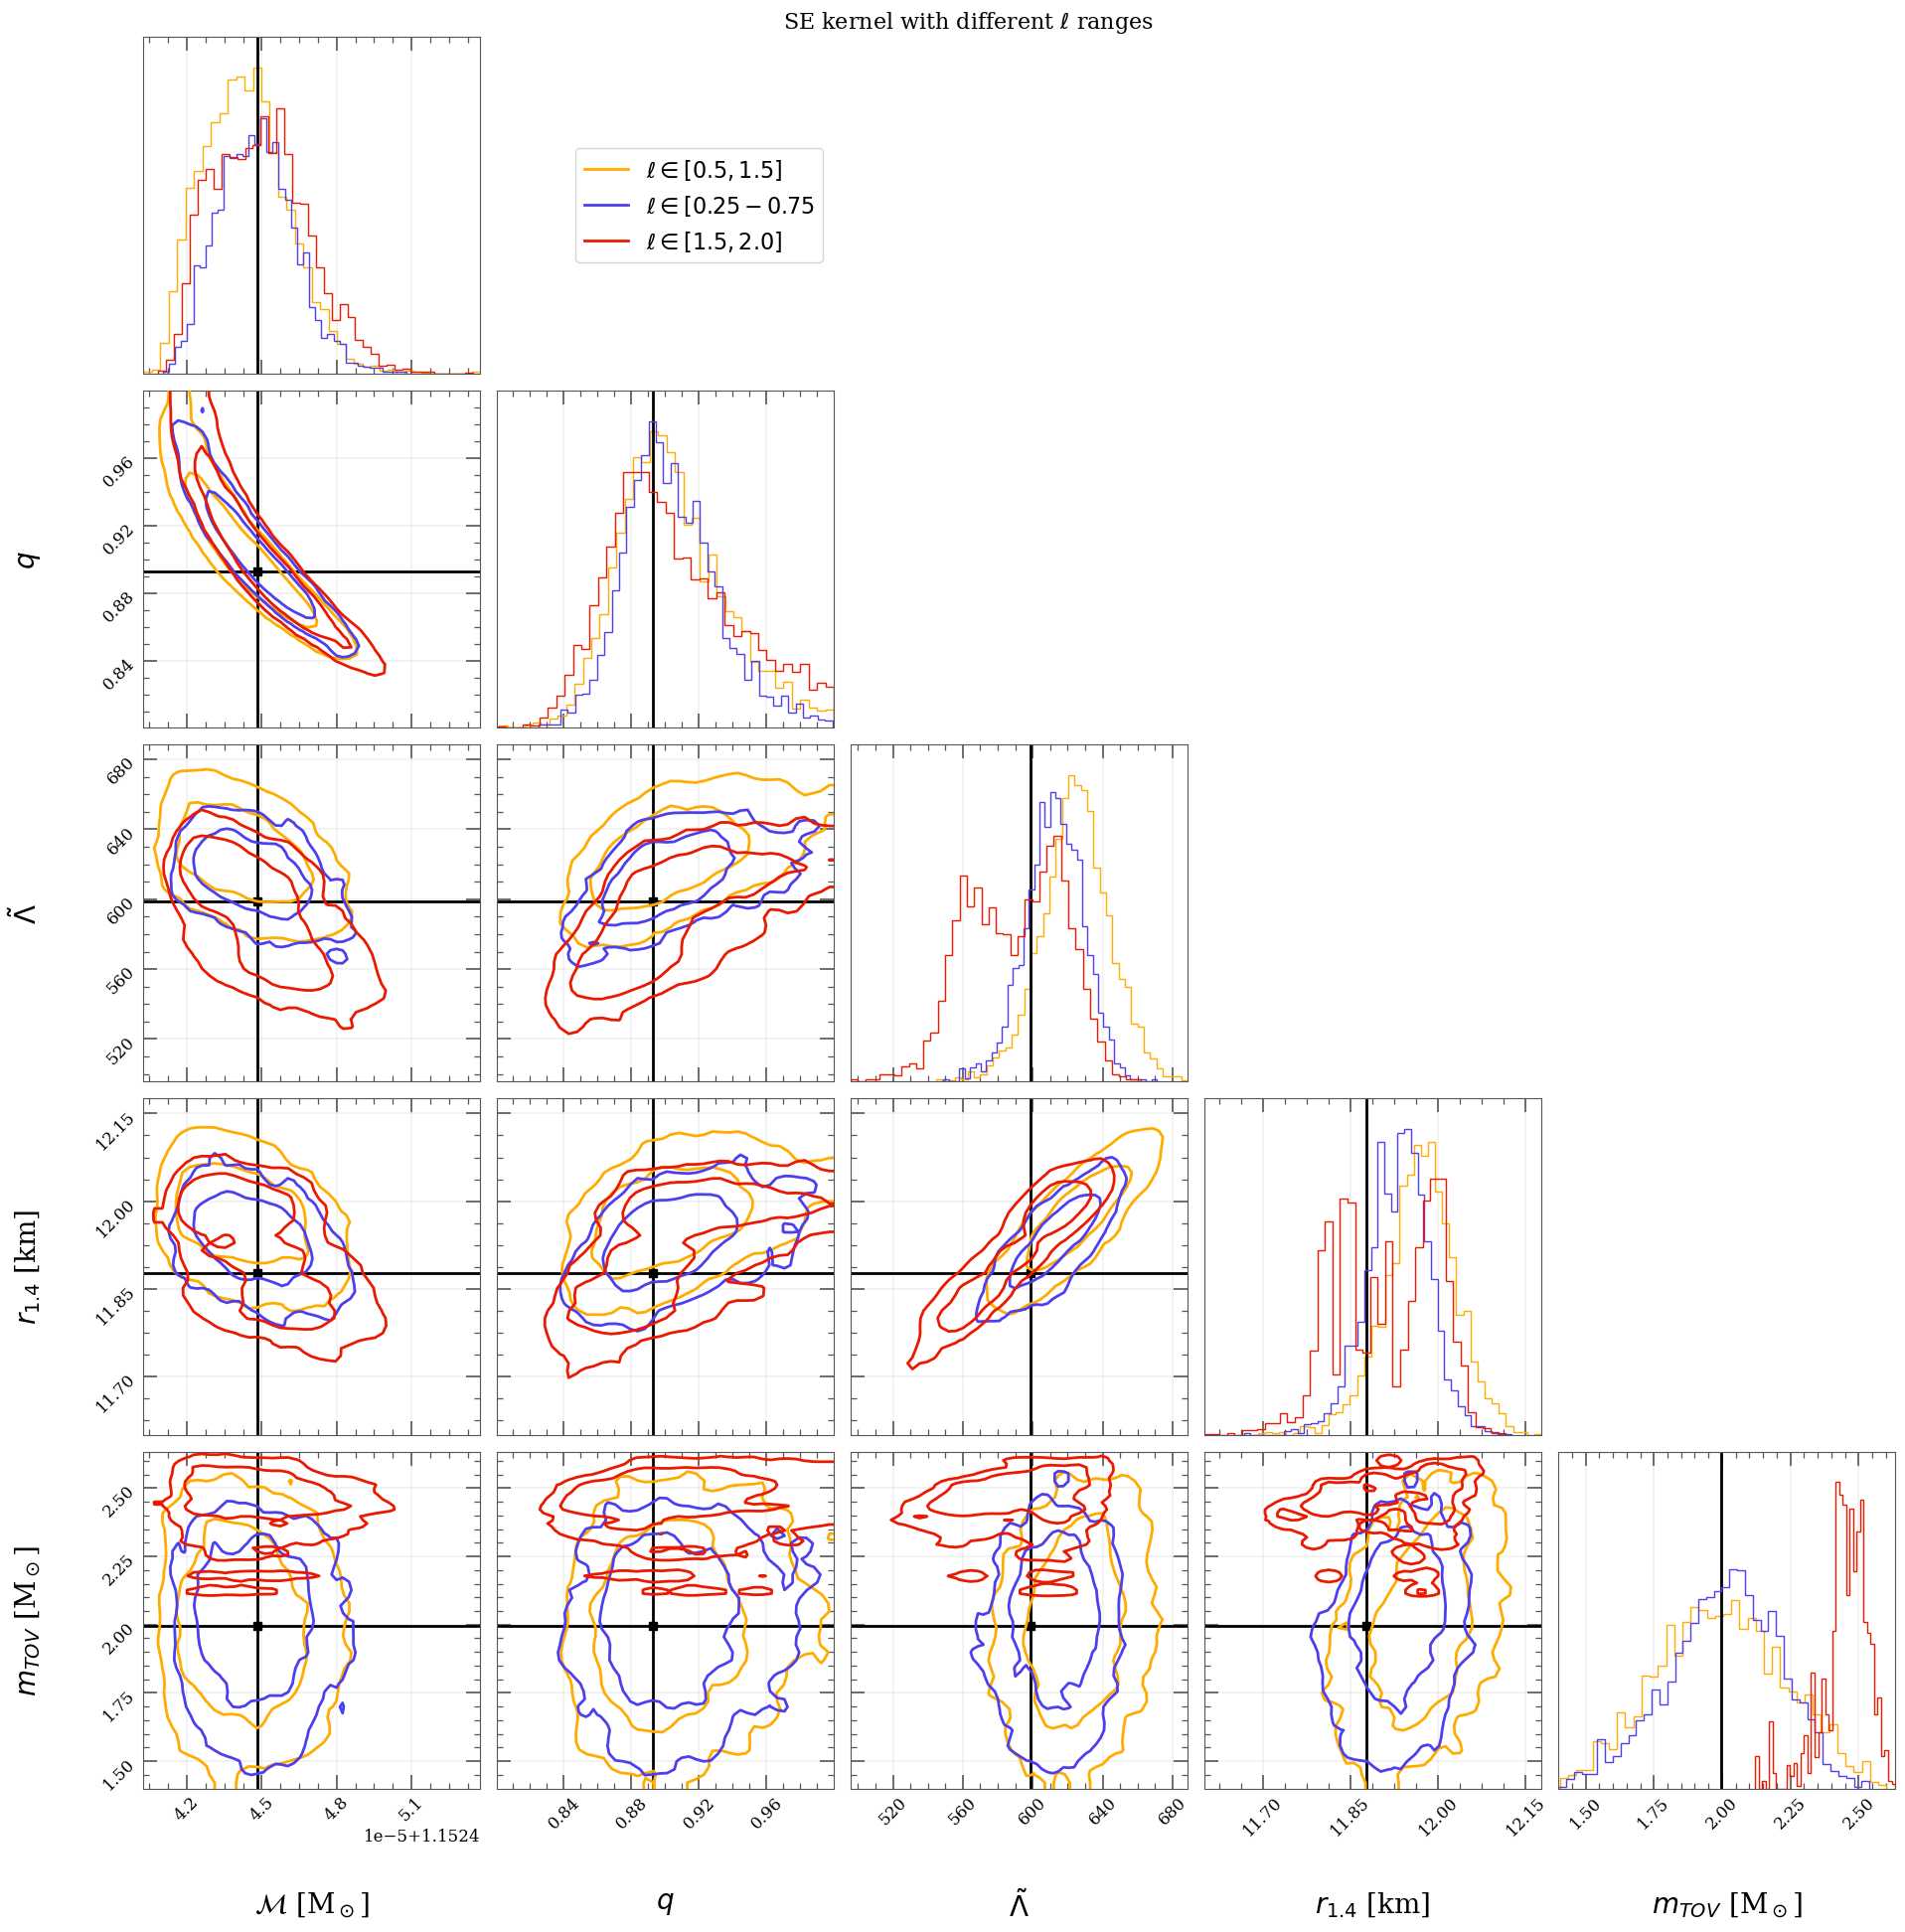

In [4]:
pa.plot_parameters([df_se,df_se2,df_se3], 
                   injected_params=[injection_param], 
                   title=r"SE kernel with different $\ell$ ranges", 
                   labels=["$\ell\in[0.5,1.5]$", "$\ell\in[0.25-0.75$", "$\ell\in[1.5,2.0]$"],
                   colours = ['#ffac00', '#4e3fee', '#ea1900', '#8EC7D2', '#DC267F'],
                   truth_colour = "black",
                   contour_fill = False,
                   )

# SE in $\phi$ and $c^2_s$

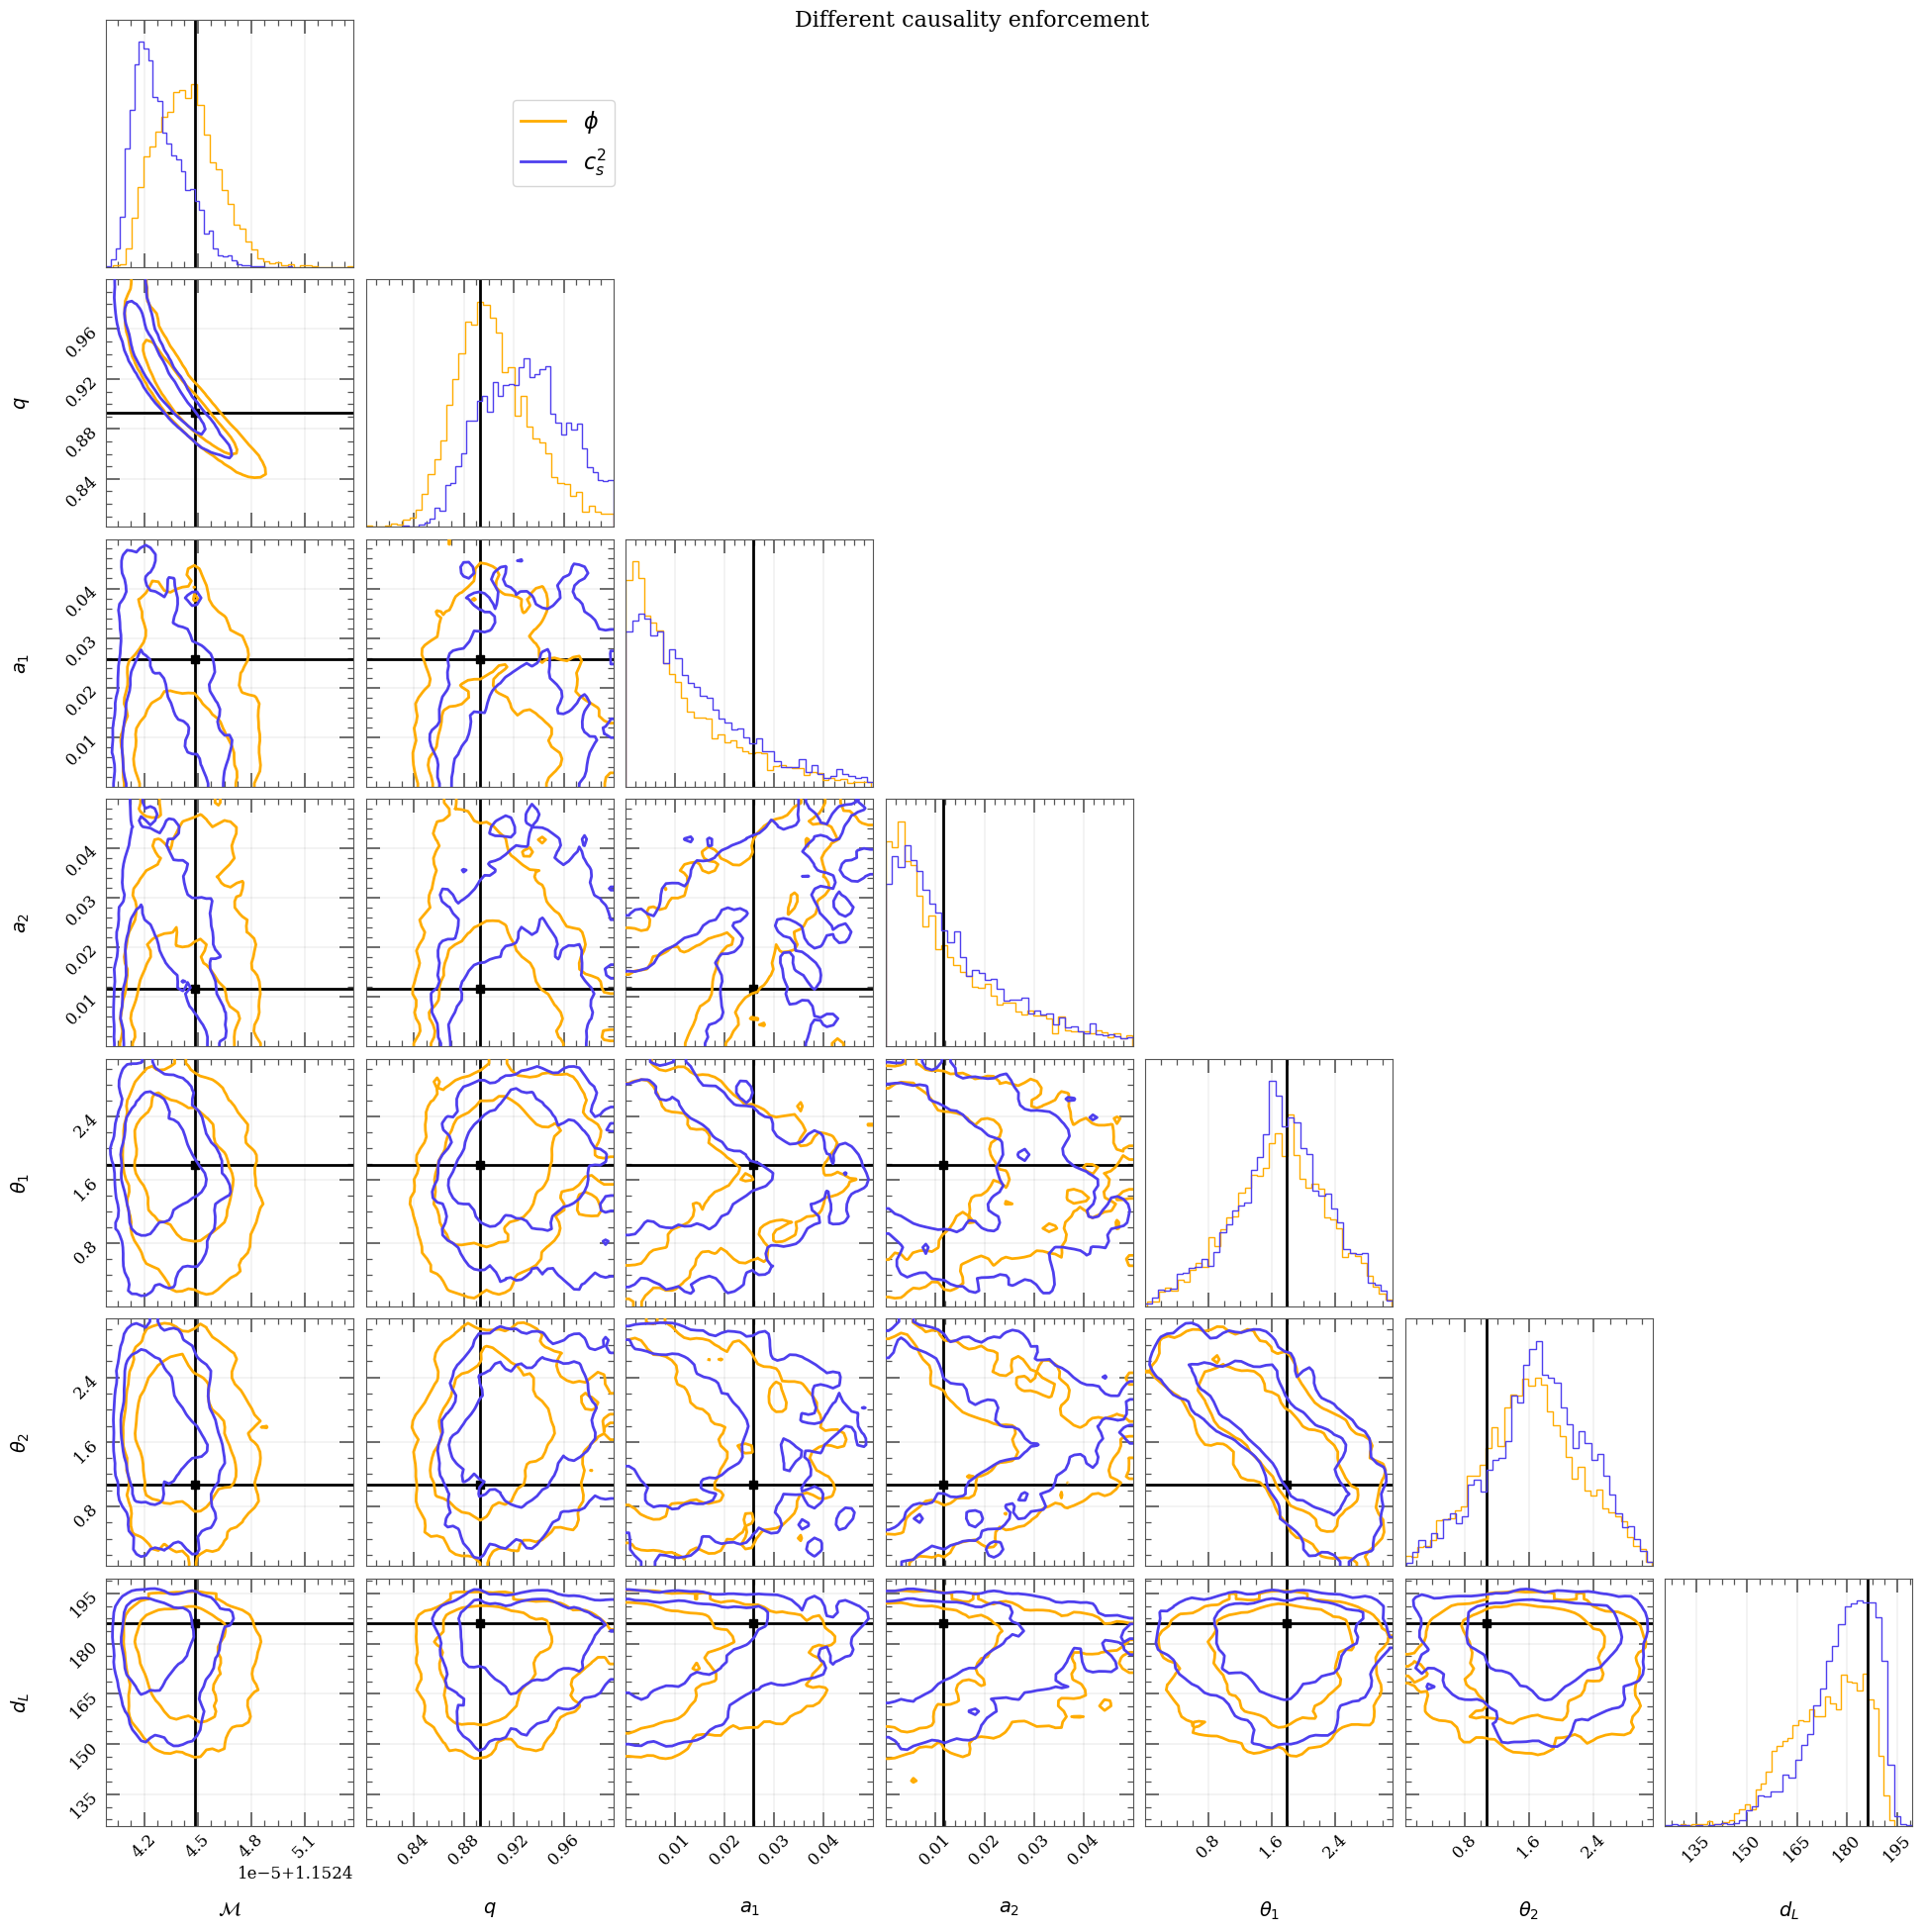

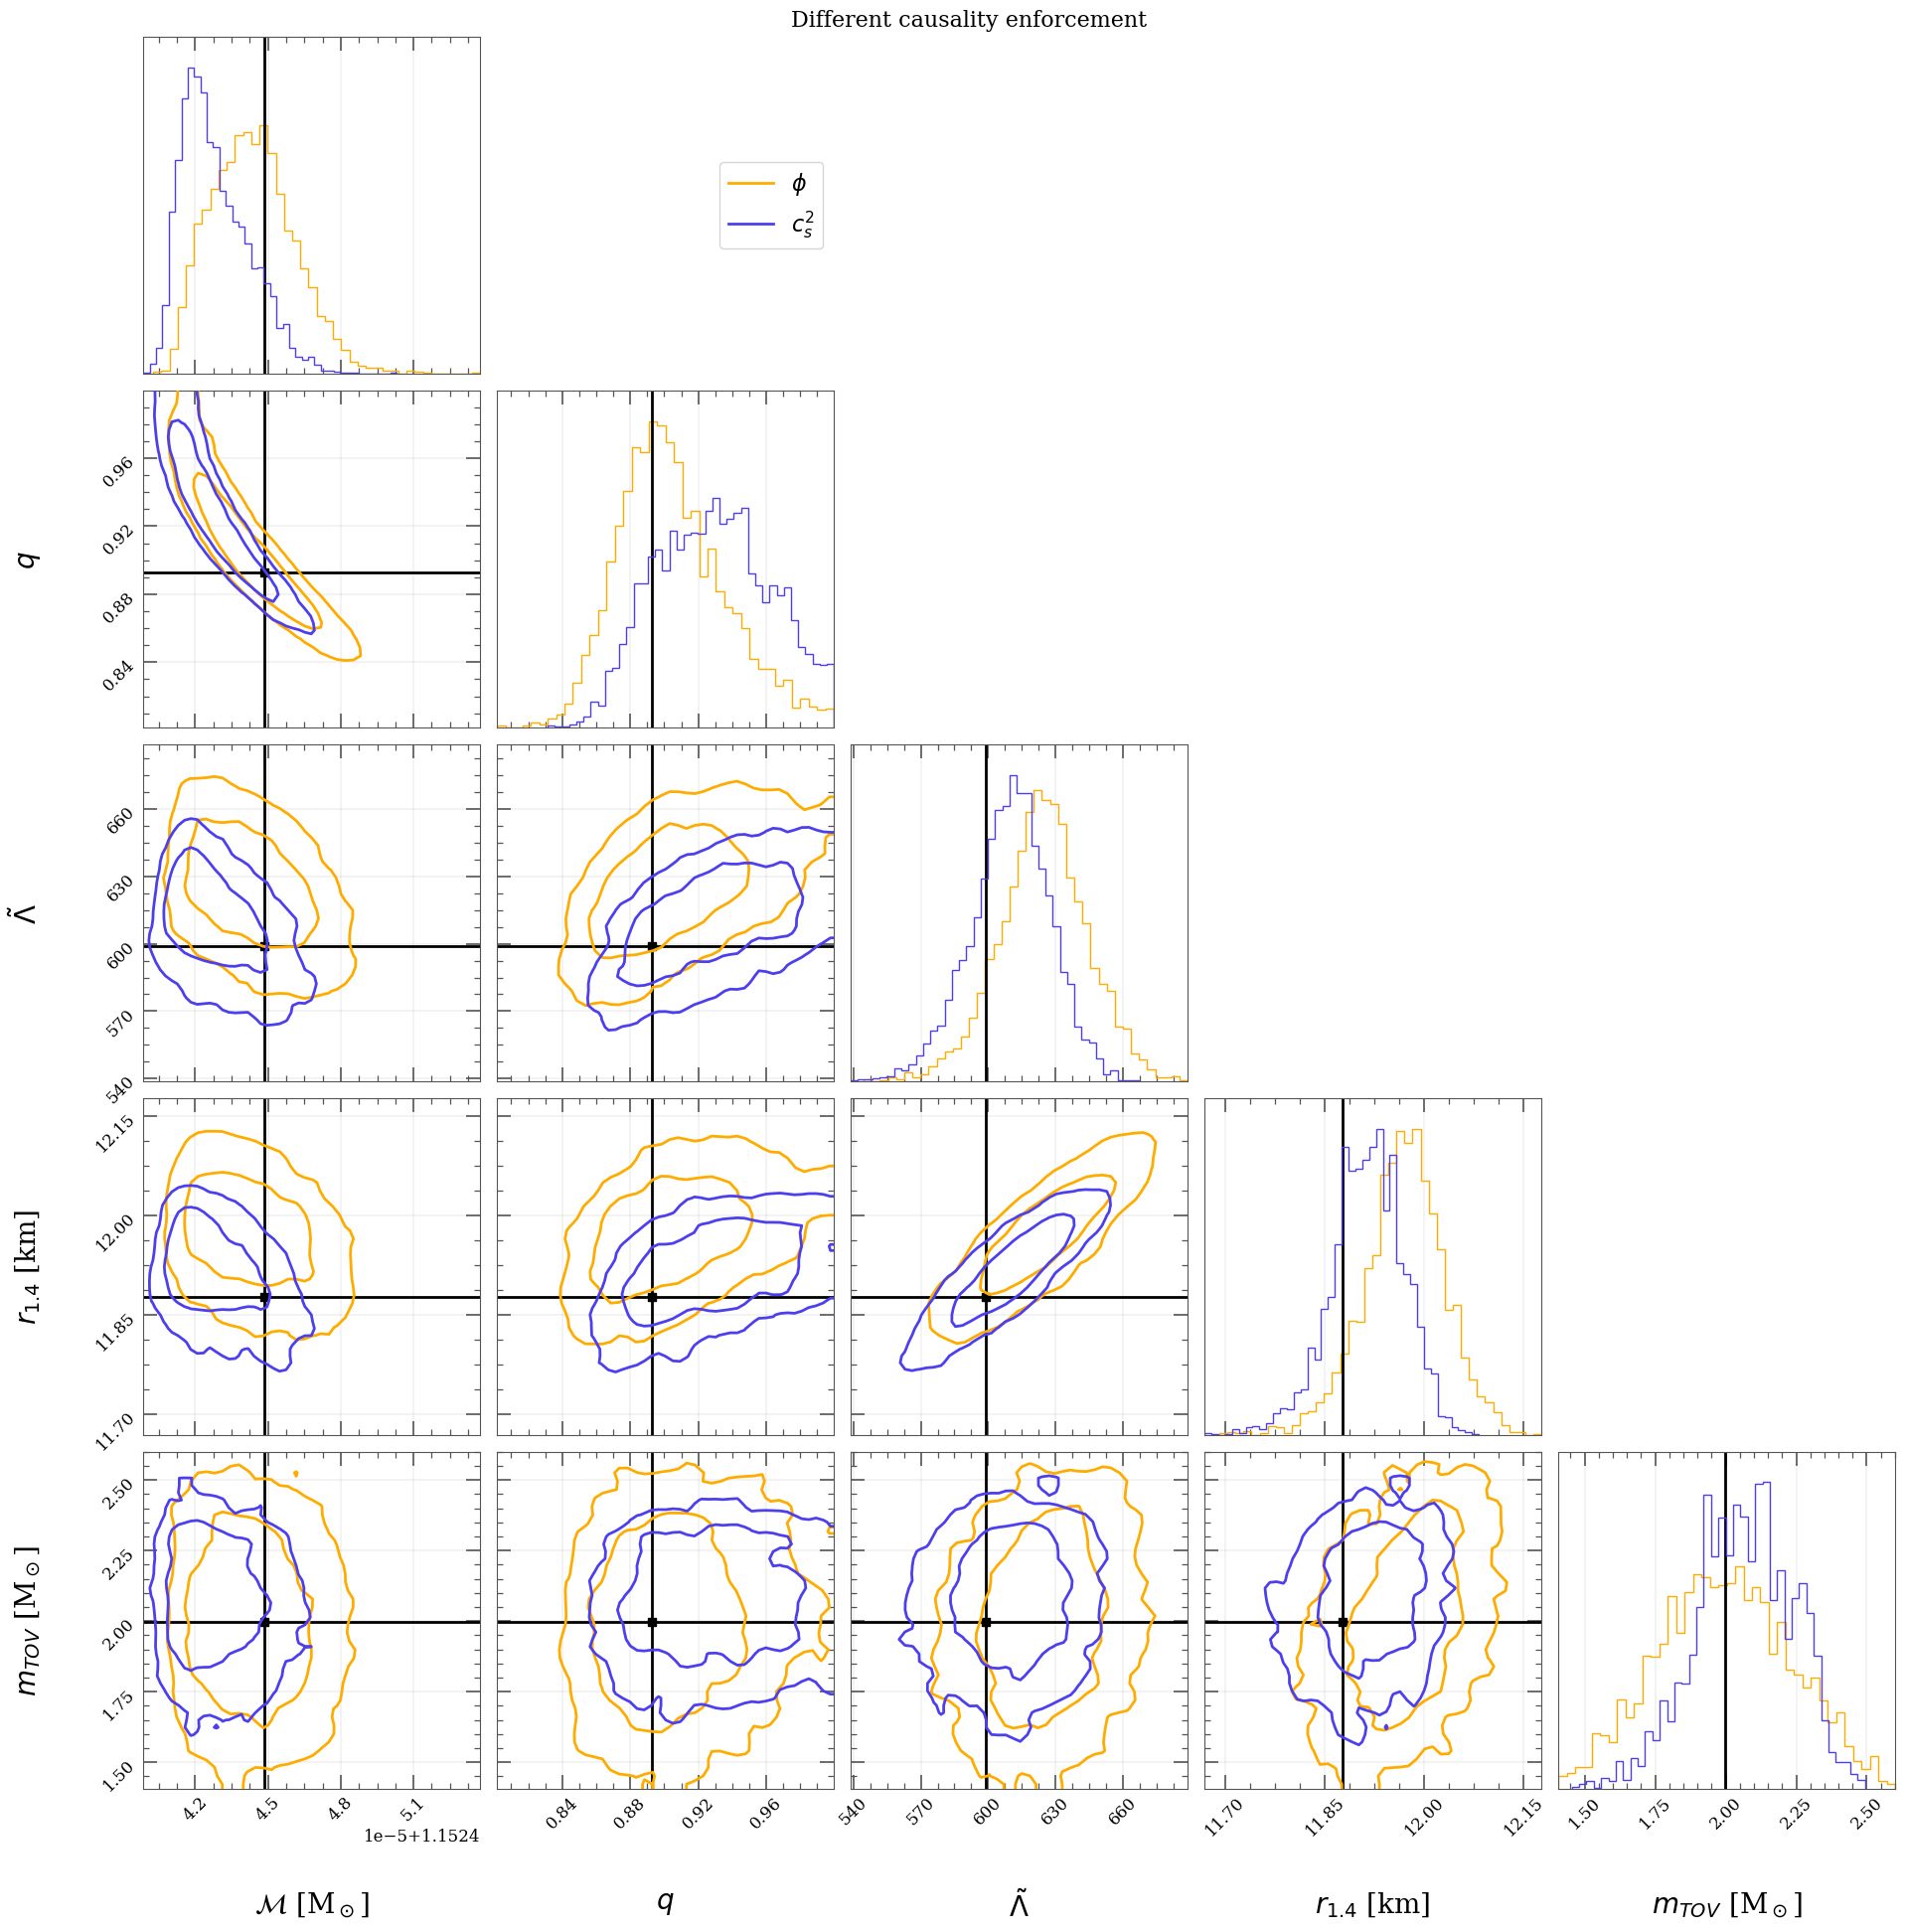

In [5]:
pa.plot_parameters([df_se,df_se4], 
                   injected_params=[injection_param], 
                   title=r"Different causality enforcement", 
                   labels=["$\phi$", "$c^2_s$"],
                   colours = ['#ffac00', '#4e3fee', '#ea1900', '#8EC7D2', '#DC267F'],
                   truth_colour = "black",
                   contour_fill = False,
                   )